In [11]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

## 훈련용 데이터은 24%

In [183]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv('./data/test.csv')

In [184]:
data_test.shape

(19537, 15)

In [185]:
train_len = len(data_train)

In [186]:
y = data_train['income']

In [187]:
del data_train['income']
data_train.shape

(29305, 15)

In [188]:
data_all = pd.concat([data_train, data_test], sort=False)
data_all.shape

(48842, 15)

## marital-status

In [189]:
data_all['marital-status'][data_all['marital-status']!=' Married-civ-spouse'] = 0

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
data_all['marital-status'][data_all['marital-status']==' Married-civ-spouse'] = 1

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [191]:
data_all.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,1,25,Private,219199,11th,7,0,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
1,2,39,Private,52978,Some-college,10,0,Other-service,Not-in-family,White,Female,0,1721,55,United-States
2,3,35,Private,196899,Bachelors,13,0,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti
3,4,64,Private,135527,Assoc-voc,11,0,Tech-support,Not-in-family,White,Female,0,0,40,United-States
4,5,24,Private,60783,Some-college,10,1,Transport-moving,Husband,White,Male,0,0,70,United-States


In [192]:
data_all['marital-status'] = data_all['marital-status'].astype('int64')

## relationship

In [193]:
data_all['relationship'][(data_all['relationship']!=' Husband') & (data_all['relationship']!=' Wife')] = 0

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
data_all['relationship'][(data_all['relationship']==' Husband') | (data_all['relationship']==' Wife')] = 1

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
data_all.relationship.value_counts()

0    26795
1    22047
Name: relationship, dtype: int64

In [196]:
data_all['relationship'] = data_all['relationship'].astype('int64')

In [197]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
no                29305 non-null int64
age               29305 non-null int64
workclass         29305 non-null object
fnlwgt            29305 non-null int64
education         29305 non-null object
education-num     29305 non-null int64
marital-status    29305 non-null object
occupation        29305 non-null object
relationship      29305 non-null object
race              29305 non-null object
sex               29305 non-null object
capital-gain      29305 non-null int64
capital-loss      29305 non-null int64
hours-per-week    29305 non-null int64
native-country    29305 non-null object
dtypes: int64(7), object(8)
memory usage: 3.4+ MB


In [85]:
%matplotlib inline

In [86]:
aaa = pd.concat([one_hot_encoding[:len(data_train)], y], axis=1)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

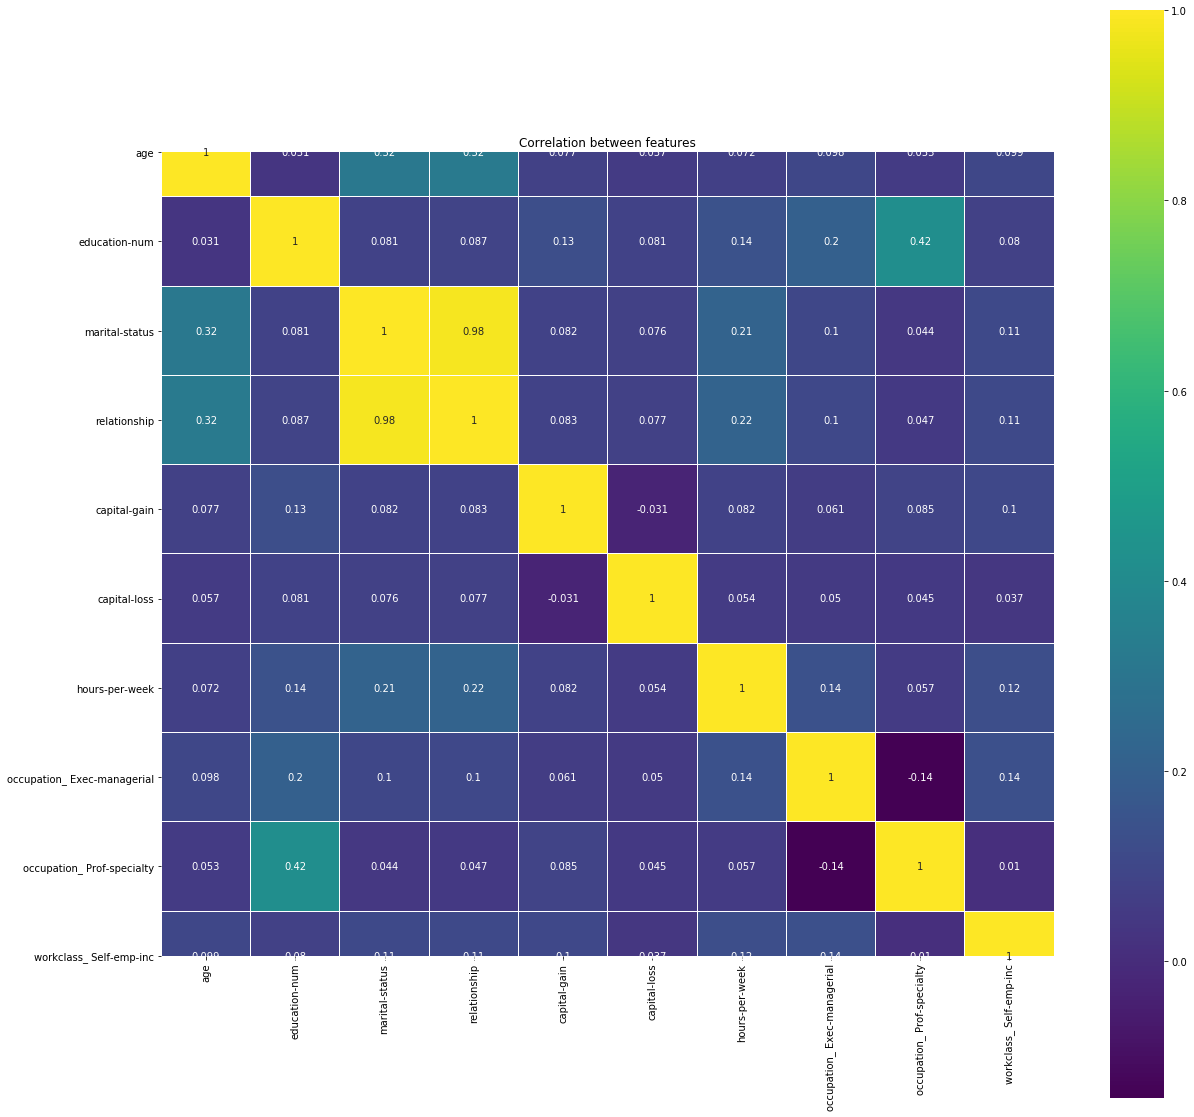

In [402]:

plt.figure(figsize=(20, 20))
sns.heatmap(data_ver1.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

age, education_num, marital_status, relationship, capital_gain, (capital_loss), hours_per_week, Occupation_Exec-managerial, Occupation_Prof-specialty, (workclass_Self-emp-inc)

In [198]:
del data_all['education']
del data_all['native-country']
del data_all['no']
del data_all['race']

In [150]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 11 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education-num     48842 non-null int64
marital-status    48842 non-null int64
occupation        48842 non-null object
relationship      48842 non-null int64
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
dtypes: int64(8), object(3)
memory usage: 4.5+ MB


In [ ]:
X = train[['age','fnlwgt', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [199]:
one_hot_encoding = pd.get_dummies(data_all)
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 34 columns):
age                              48842 non-null int64
fnlwgt                           48842 non-null int64
education-num                    48842 non-null int64
marital-status                   48842 non-null int64
relationship                     48842 non-null int64
capital-gain                     48842 non-null int64
capital-loss                     48842 non-null int64
hours-per-week                   48842 non-null int64
workclass_ ?                     48842 non-null uint8
workclass_ Federal-gov           48842 non-null uint8
workclass_ Local-gov             48842 non-null uint8
workclass_ Never-worked          48842 non-null uint8
workclass_ Private               48842 non-null uint8
workclass_ Self-emp-inc          48842 non-null uint8
workclass_ Self-emp-not-inc      48842 non-null uint8
workclass_ State-gov             48842 non-null uint8
workclass_ Without-pay     

In [152]:
one_hot_encoding.columns

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'sex_ Female', 'sex_ Male'],
      dtype='object')

In [153]:
one_hot_encoding['agexeducation-num'] = one_hot_encoding['age'] * one_hot_encoding['education-num']
one_hot_encoding['agexmarital-status'] = one_hot_encoding['age'] * one_hot_encoding['marital-status']
one_hot_encoding['agexrelationship'] = one_hot_encoding['age'] * one_hot_encoding['relationship']
#one_hot_encoding['agexsex'] = one_hot_encoding['age'] * one_hot_encoding['sex']
one_hot_encoding['agexhours-per-week'] = one_hot_encoding['age'] * one_hot_encoding['hours-per-week']
one_hot_encoding['fnlwgtxmarital-status'] = one_hot_encoding['fnlwgt'] * one_hot_encoding['marital-status']
one_hot_encoding['fnlwgtxrelationship'] = one_hot_encoding['fnlwgt'] * one_hot_encoding['relationship']
one_hot_encoding['education-numxeducation-num'] = one_hot_encoding['education-num'] * one_hot_encoding['education-num']
one_hot_encoding['education-numxmarital-status'] = one_hot_encoding['education-num'] * one_hot_encoding['marital-status']
one_hot_encoding['education-numxrelationship'] = one_hot_encoding['education-num'] * one_hot_encoding['relationship']
#one_hot_encoding['education-numxsex'] = one_hot_encoding['education-num'] * one_hot_encoding['sex']
one_hot_encoding['education-numxhours-per-week'] = one_hot_encoding['education-num'] * one_hot_encoding['hours-per-week']
one_hot_encoding['marital-statusxmarital-status'] = one_hot_encoding['marital-status'] * one_hot_encoding['marital-status']
one_hot_encoding['marital-statusxrelationship'] = one_hot_encoding['marital-status'] * one_hot_encoding['relationship']
#one_hot_encoding['marital-statusxsex'] = one_hot_encoding['marital-status'] * one_hot_encoding['sex']
one_hot_encoding['marital-statusxhours-per-week'] = one_hot_encoding['marital-status'] * one_hot_encoding['hours-per-week']
one_hot_encoding['relationshipxrelationship'] = one_hot_encoding['relationship'] * one_hot_encoding['relationship']
#one_hot_encoding['relationshipxsex'] = one_hot_encoding['relationship'] * one_hot_encoding['sex']
one_hot_encoding['relationshipxhours-per-week'] = one_hot_encoding['relationship'] * one_hot_encoding['hours-per-week']

In [399]:
#data_ver1 = one_hot_encoding[['age', 'education-num', 'marital-status', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'workclass_ Self-emp-inc']]

In [109]:
one_hot_encoding

,age,fnlwgt,education-num,marital-status,relationship,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,fnlwgtxrelationship,education-numxeducation-num,education-numxmarital-status,education-numxrelationship,education-numxhours-per-week,marital-statusxmarital-status,marital-statusxrelationship,marital-statusxhours-per-week,relationshipxrelationship,relationshipxhours-per-week
0,25,219199,7,0,0,0,0,40,0,0,...,0,49,0,0,280,0,0,0,0,0
1,39,52978,10,0,0,0,1721,55,0,0,...,0,100,0,0,550,0,0,0,0,0
2,35,196899,13,0,0,0,0,50,0,0,...,0,169,0,0,650,0,0,0,0,0
3,64,135527,11,0,0,0,0,40,0,0,...,0,121,0,0,440,0,0,0,0,0
4,24,60783,10,1,1,0,0,70,0,0,...,60783,100,10,10,700,1,1,70,1,70
5,66,274451,5,1,1,0,0,25,0,0,...,274451,25,5,5,125,1,1,25,1,25
6,56,152874,13,0,0,0,1741,40,0,0,...,0,169,0,0,520,0,0,0,0,0
7,70,165586,9,1,1,0,0,40,0,0,...,165586,81,9,9,360,1,1,40,1,40
8,21,211013,11,1,0,0,0,50,0,0,...,0,121,11,0,550,1,0,50,0,0
9,33,192644,9,0,0,0,0,35,0,0,...,0,81,0,0,315,0,0,0,0,0


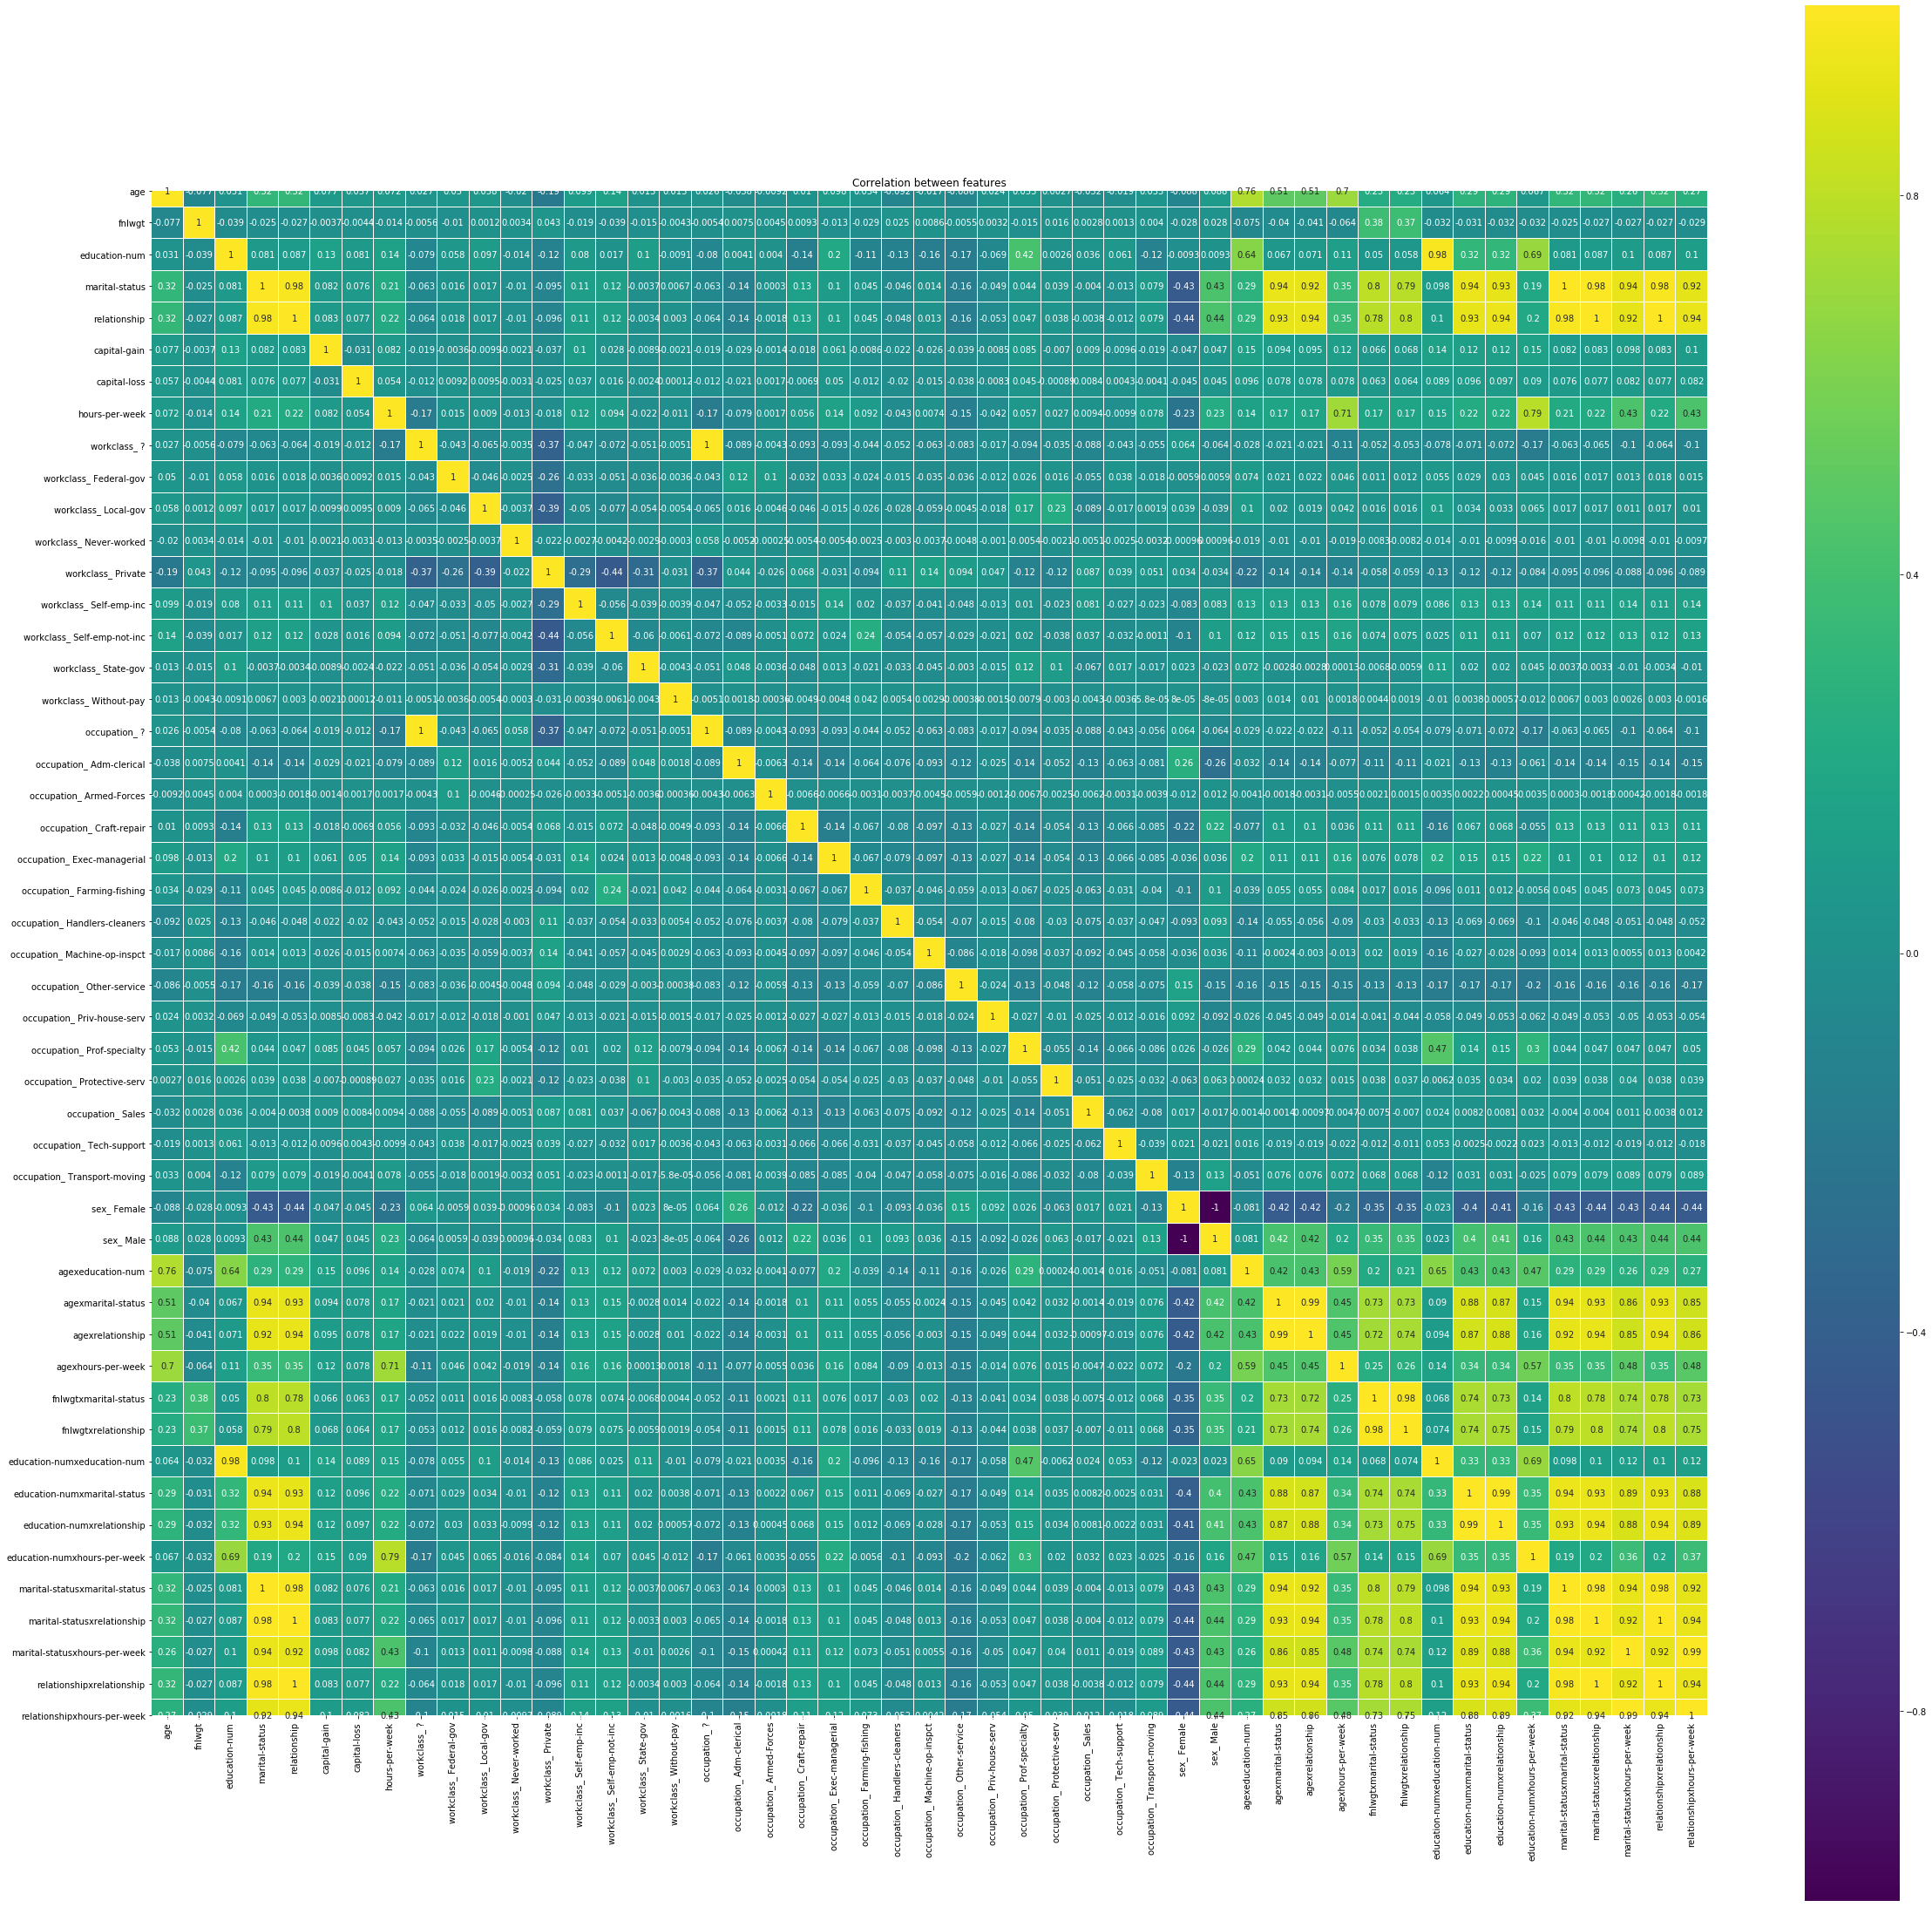

In [524]:
plt.figure(figsize=(40, 40))
sns.heatmap(one_hot_encoding.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## Data preprocessing

In [154]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler

In [200]:
sc = MinMaxScaler()
sc.fit(one_hot_encoding)
#sc = MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))

In [201]:
one_hot_encoding = sc.transform(one_hot_encoding)

In [202]:
sc = QuantileTransformer()
sc.fit(one_hot_encoding)
#sc = MinMaxScaler()

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)

In [203]:
X_tr = one_hot_encoding[:len(data_train)]
X_te = one_hot_encoding[len(data_train):]

In [204]:
X_tr = sc.transform(X_tr)
X_te = sc.transform(X_te)

In [205]:
y.shape

(29305,)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.3, random_state=1)

In [207]:
X_train.shape

(20513, 34)

In [208]:
y_train.shape

(20513,)

In [209]:
X_val = X_train[:5000]
X_train = X_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]

### keras import

In [210]:
from keras import models
from keras import layers

In [211]:
from keras import regularizers

### model construct

In [215]:
model = models.Sequential()
model.add(layers.Dense(128, kernel_initializer='normal', activation='relu', input_shape=(34,)))
model.add(layers.Dense(64, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(16, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [216]:
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [217]:
hist = model.fit(X_train,y_train, batch_size=1024, epochs=100, validation_data=(X_val, y_val))

Train on 15513 samples, validate on 5000 samples
Epoch 1/100
15513/15513 [==============================] - 1s 56us/step - loss: 0.6845 - acc: 0.7246 - val_loss: 0.6649 - val_acc: 0.7572
Epoch 2/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.6222 - acc: 0.7572 - val_loss: 0.5543 - val_acc: 0.7572
Epoch 3/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.5188 - acc: 0.7572 - val_loss: 0.4631 - val_acc: 0.7572
Epoch 4/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.4240 - acc: 0.7572 - val_loss: 0.3938 - val_acc: 0.7572
Epoch 5/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3837 - acc: 0.8142 - val_loss: 0.3780 - val_acc: 0.8238
Epoch 6/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3679 - acc: 0.8350 - val_loss: 0.3663 - val_acc: 0.8336
Epoch 7/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3555 - acc: 0.8391 - val_loss: 0.3521 - val_acc

15513/15513 [==============================] - 0s 5us/step - loss: 0.3071 - acc: 0.8539 - val_loss: 0.3335 - val_acc: 0.8404
Epoch 61/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3069 - acc: 0.8543 - val_loss: 0.3322 - val_acc: 0.8388
Epoch 62/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3055 - acc: 0.8541 - val_loss: 0.3315 - val_acc: 0.8398
Epoch 63/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3062 - acc: 0.8556 - val_loss: 0.3321 - val_acc: 0.8406
Epoch 64/100
15513/15513 [==============================] - 0s 5us/step - loss: 0.3057 - acc: 0.8568 - val_loss: 0.3328 - val_acc: 0.8382
Epoch 65/100
15513/15513 [==============================] - 0s 4us/step - loss: 0.3046 - acc: 0.8557 - val_loss: 0.3319 - val_acc: 0.8398
Epoch 66/100
15513/15513 [==============================] - 0s 4us/step - loss: 0.3050 - acc: 0.8567 - val_loss: 0.3329 - val_acc: 0.8386
Epoch 67/100
15513/15513 [=====================

In [36]:
import matplotlib.pyplot as plt

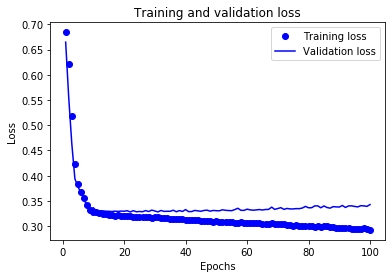

In [218]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

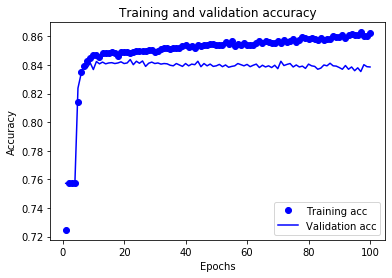

In [219]:
plt.clf()   # 그래프를 초기화합니다
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## epoch 수를 6~9 정도

In [268]:
model = models.Sequential()
model.add(layers.Dense(128, kernel_initializer='normal', activation='relu', input_shape=(39,)))
model.add(layers.Dense(128, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [269]:
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [270]:
hist = model.fit(X_train,y_train, batch_size=1024, epochs=4, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
results

Train on 15513 samples, validate on 5000 samples
Epoch 1/4
15513/15513 [==============================] - 1s 35us/step - loss: 0.5372 - acc: 0.7341 - val_loss: 0.4283 - val_acc: 0.7720
Epoch 2/4
15513/15513 [==============================] - 0s 4us/step - loss: 0.4011 - acc: 0.8163 - val_loss: 0.3835 - val_acc: 0.8148
Epoch 3/4
15513/15513 [==============================] - 0s 4us/step - loss: 0.3822 - acc: 0.8227 - val_loss: 0.3717 - val_acc: 0.8224
Epoch 4/4
8792/8792 [==============================] - 0s 31us/step


[0.3882837594097804, 0.8205186533212011]

In [95]:
X_te

array([[-1.50569139, -0.14480353, -0.2171271 , ..., -0.29301942,
        -0.20560632, -0.02073988],
       [-0.70337896, -0.14480353, -0.2171271 , ..., -0.29301942,
        -0.20560632, -0.02073988],
       [ 0.46362095, -0.14480353, -0.2171271 , ..., -0.29301942,
        -0.20560632, -0.02073988],
       ...,
       [ 1.77649584,  0.44376782, -0.2171271 , ..., -0.29301942,
        -0.20560632, -0.02073988],
       [-1.50569139, -0.14480353, -0.2171271 , ..., -0.29301942,
        -0.20560632, -0.02073988],
       [-0.55750397, -0.14480353, -0.2171271 , ..., -0.29301942,
        -0.20560632, -0.02073988]])

In [102]:
y_pred = model.predict(X_te)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [103]:
yy = pd.DataFrame(y_pred)

In [505]:
yy.iloc[:, 0].value_counts()

False    16148
True      3389
Name: 0, dtype: int64

In [506]:
3389/len(y_pred)

0.1734657316885909

In [507]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [509]:
from sklearn.metrics import accuracy_score

In [510]:
score = accuracy_score(y_test, y_pred)
score

0.8461101000909919

In [384]:
y_pred = pd.DataFrame(y_pred, columns=['income'])
y_pred['income'].replace(True, 1, inplace=True)
y_pred['income'].replace(False, 0, inplace=True)

In [385]:
y_pred = y_pred.astype('int64')

In [386]:
result = pd.concat([pd.DataFrame(list(range(29306, 48843)), columns=['no']), y_pred], axis=1)

In [387]:
result.to_csv('./submission.csv', index=False)